<a href="https://colab.research.google.com/github/andrewc998/pandas_statiscal_methods_and_visualization/blob/main/12th_March_titanic_data_anal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np       # Numerical operations
import pandas as pd      # Data manipulation
import matplotlib.pyplot as plt  # Basic visualization
import seaborn as sns    # Statistical visualization


In [5]:
df_titanic = pd.read_csv("/content/drive/MyDrive/titanic.csv")
df_titanic


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1386,839.0,0.0,?,"Rush, Mr. Alfred George John",male,47.0,0.0,4.0,113510,12.8750,B79,C
1387,839.0,1.0,2,"Skoog, Master. Harald",female,17.0,5.0,5.0,2671,17.4000,E49,NaN
1388,839.0,0.0,?,"Slocovski, Mr. Selman Francis",male,47.0,8.0,4.0,239854,7.0500,B49,NaN
1389,839.0,1.0,?,"Glynn, Miss. Mary Agatha",male,48.0,1.0,0.0,36866,8.6625,F G63,C


In [6]:
df_no_duplicates = df_titanic.drop_duplicates()
df_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1291 entries, 0 to 1390
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1291 non-null   float64
 1   Survived     1291 non-null   float64
 2   Pclass       1291 non-null   object 
 3   Name         1291 non-null   object 
 4   Sex          1291 non-null   object 
 5   Age          1109 non-null   float64
 6   SibSp        1291 non-null   float64
 7   Parch        1291 non-null   float64
 8   Ticket       1291 non-null   object 
 9   Fare         1291 non-null   float64
 10  Cabin        602 non-null    object 
 11  Embarked     1189 non-null   object 
dtypes: float64(6), object(6)
memory usage: 131.1+ KB


In [7]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1391 non-null   float64
 1   Survived     1391 non-null   float64
 2   Pclass       1391 non-null   object 
 3   Name         1391 non-null   object 
 4   Sex          1391 non-null   object 
 5   Age          1209 non-null   float64
 6   SibSp        1391 non-null   float64
 7   Parch        1391 non-null   float64
 8   Ticket       1391 non-null   object 
 9   Fare         1391 non-null   float64
 10  Cabin        602 non-null    object 
 11  Embarked     1289 non-null   object 
dtypes: float64(6), object(6)
memory usage: 130.5+ KB


In [8]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df_titanic.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,1391.000000,1391.000000,1209.000000,1391.000000,1391.000000,1391.000000
mean,527.020848,0.381021,29.731894,1.399712,1.141625,32.145048
std,307.457244,0.485812,16.070125,2.097919,1.771294,48.662200
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,248.500000,0.000000,20.000000,0.000000,0.000000,7.895800
50%,596.000000,0.000000,27.000000,1.000000,0.000000,13.500000
75%,839.000000,1.000000,40.000000,2.000000,2.000000,33.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# detecting null  values

df_titanic.isna().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,182
SibSp,0
Parch,0
Ticket,0
Fare,0


In [14]:
# get the mean fare (Fare) per class (Pclass)
avg_fare_1 = df_titanic.groupby('Pclass').mean('Fare')
avg_fare_1 # returns all numeric columns

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,587.216393,0.573770,36.511812,1.363934,1.386885,67.452418
2,588.054152,0.465704,29.263158,1.451264,1.303249,27.788990
3,427.434191,0.245083,25.735424,1.116490,0.747352,16.509801
?,733.513514,0.432432,32.493309,2.641892,2.094595,37.366526


In [15]:
# get the mean fare per class
avg_fare = df_titanic.groupby('Pclass')['Fare'].mean()
avg_fare # this is more recommended

,Fare
Pclass,
1,67.452418
2,27.788990
3,16.509801
?,37.366526


In [16]:
avg_gender_1 = df_titanic.groupby(['Pclass','Sex']).mean('Fare')
avg_gender_1

PassengerId  Survived        Age     SibSp     Parch       Fare
Pclass Sex                                                                    
1      female   581.905512  0.818898  34.098291  1.456693  1.456693  84.416536
       male     591.005618  0.398876  38.287799  1.297753  1.337079  55.348805
2      female   602.090164  0.729508  26.338992  1.590164  1.606557  26.972406
       male     577.006452  0.258065  31.630340  1.341935  1.064516  28.431720
3      female   515.882979  0.505319  25.677973  1.664894  1.505319  19.908623
       male     392.279070  0.141649  25.757624  0.898520  0.446089  15.158895
?      female   745.403226  0.548387  32.011356  3.274194  2.112903  49.604234
       male     724.941860  0.348837  32.862597  2.186047  2.081395  28.543993

In [17]:
# group by pclass and gender to find avg fare
#show you the average fare for each combination of passenger class and gender,
# allowing you to compare these averages and identify any potential patterns or differences.
avg_gender = df_titanic.groupby(['Pclass','Sex'])['Fare'].mean()
avg_gender

Pclass  Sex   
1       female    84.416536
        male      55.348805
2       female    26.972406
        male      28.431720
3       female    19.908623
        male      15.158895
?       female    49.604234
        male      28.543993
Name: Fare, dtype: float64

In [19]:
pclass_count = df_titanic.groupby('Pclass')['Fare']
print(pclass_count)

In [20]:
# group by Pclass and alculate multiple statistics for fare
fare_stats = df_titanic.groupby('Pclass')['Fare'].agg(['count', 'mean', 'min', 'max', 'median'])
fare_stats

,count,mean,min,max,median
Pclass,,,,,
1,305,67.452418,0.0,512.3292,51.8625
2,277,27.788990,0.0,247.5208,15.0500
3,661,16.509801,0.0,512.3292,7.9250
?,148,37.366526,0.0,247.5208,20.3875


In [24]:
# add new column mean fare per class
# first get mean fare per class
df_titanic['Avg_Fare_per_class'] = df_titanic.groupby('Pclass')['Fare'].transform('mean')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Avg_Fare_per_class
0,1.0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S,16.509801
1,2.0,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C,67.452418
2,3.0,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S,16.509801
3,4.0,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,67.452418
4,5.0,0.0,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S,16.509801


In [25]:
# using lambda function and .apply to get mean
df_titanic['Avg_Fare_per_class'] = df_titanic.groupby('Pclass')['Fare'].apply(lambda x: x.mean())
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Avg_Fare_per_class
0,1.0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S,NaN
1,2.0,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C,NaN
2,3.0,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4.0,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,NaN
4,5.0,0.0,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S,NaN


In [30]:
#proceed to find classes with mean fare above 50 - filtering groups
# group by pc class and get mean for each group
avg_fare = df_titanic.groupby('Pclass')['Fare'].mean()
print(avg_fare)
above_50 = [] #introduce an array
for pclass, fare in avg_fare.items():
  if fare > 50:
    print(pclass)


Pclass
1    67.452418
2    27.788990
3    16.509801
?    37.366526
Name: Fare, dtype: float64
1


In [36]:
# count number of passangers in each ticket class
passenger_count_per_class = df_titanic.groupby('Pclass')['PassengerId'].count()

print(passenger_count_per_class)

Pclass
1    305
2    277
3    661
?    148
Name: PassengerId, dtype: int64


In [37]:
# group by gender and survival rate
gender_survival = df_titanic.groupby(['Sex', 'Survived'])['Survived'].count()
print(gender_survival)

Sex     Survived
female  0.0         177
        1.0         322
male    0.0         684
        1.0         208
Name: Survived, dtype: int64


In [ ]:

# gets sum of survivors by gender for each passenger class
survival_count_by_class_gender = df_titanic.groupby(['Pclass', 'Sex'])['Survived'].sum()

print(survival_count_by_class_gender)

Pclass  Sex   
1       female    104.0
        male       71.0
2       female     89.0
        male       40.0
3       female     95.0
        male       67.0
?       female     34.0
        male       30.0
Name: Survived, dtype: float64


In [ ]:
survival_rate_by_class_gender = df_titanic.groupby(['Pclass', 'Sex'])['Survived'].mean()
survival_rate_by_class_gender = survival_rate_by_class_gender * 100

print(survival_rate_by_class_gender)

Pclass  Sex   
1       female    81.889764
        male      39.887640
2       female    72.950820
        male      25.806452
3       female    50.531915
        male      14.164905
?       female    54.838710
        male      34.883721
Name: Survived, dtype: float64


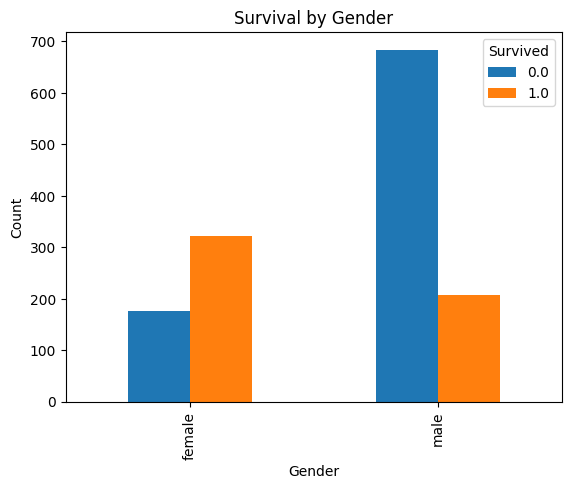

In [43]:
gender_survival.unstack().plot(kind='bar')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Survival by Gender")
plt.show()